In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# Analyse PacBio Lib1

## Tableau de sortie de Snakemake
Chaque ligne est un reads defini par son origine (sample_id) et sa taxonomy (k,p,c,o ... )

In [196]:
data = pd.read_table("final.txt", header=None, sep=" ")
data.columns = ["taxon","name","ident", "k","p","c","o","f","g","s"]
data.insert(0, "sample_id",data.name.str.extract("\w+_(\w+)_\w+", expand=True))
data.drop("name", axis=1, inplace=True)
data.head()
data.to_csv("reads.csv")

### Proportion des espèces parmis tous les reads  
L'assignation ne va pas toujours jusqu'à l'espèce. On supprime pour voir que les espèces nommés

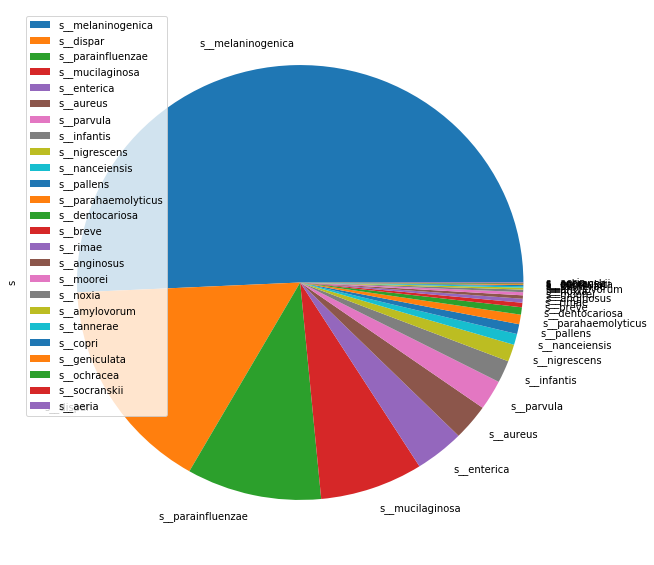

In [157]:
species = pd.DataFrame(data.s.value_counts())
species = species.drop("s__", axis=0) # Supprime les especes sans noms
species.plot.pie("s", figsize=(10,10))

## Proportion des genres parmis tous les reads

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b51115ef0>], dtype=object)

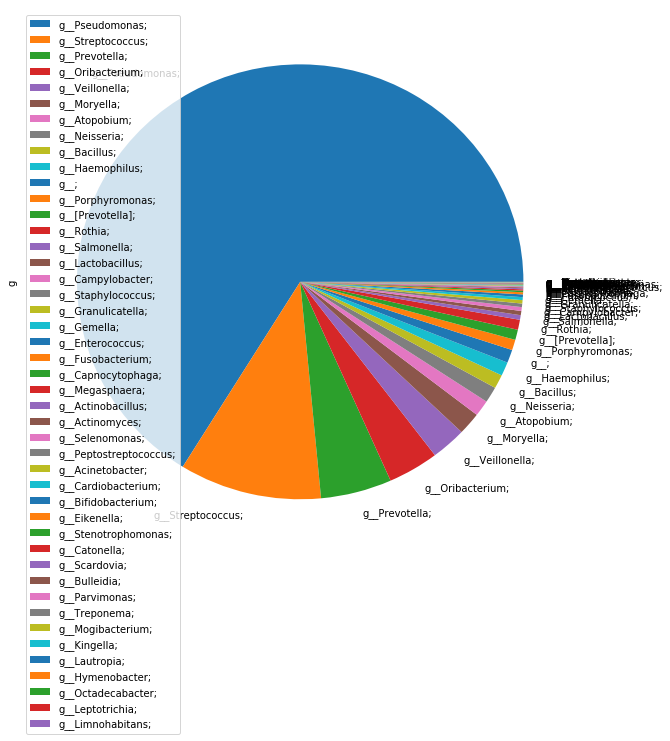

In [91]:
genus = pd.DataFrame(data.g.value_counts())
genus.plot.pie("g", figsize=(10,10))

# Conversion du tableau en table des OTUS

In [195]:
otu = data[["sample_id","k","p","c","o","f","g","s"]]
#otu = otu.groupby(["sample_id","k","p","c","o","f","g","s"]).count().pivot(index="sample_id")

#s_columns = otu.columns
#s_index = otu.index

# NOrmalizer 
#<scaler = preprocessing.MinMaxScaler()
#otu = pd.DataFrame(scaler.fit_transform(otu), columns=s_columns, index=s_index)
otu

,sample_id,k,p,c,o,f,g,s
0,lbc89,k__Bacteria;,p__Proteobacteria;,c__Gammaproteobacteria;,o__Pseudomonadales;,f__Pseudomonadaceae;,g__Pseudomonas;,s__
1,lbc89,k__Bacteria;,p__Proteobacteria;,c__Gammaproteobacteria;,o__Pseudomonadales;,f__Pseudomonadaceae;,g__Pseudomonas;,s__
2,lbc41,k__Bacteria;,p__Proteobacteria;,c__Gammaproteobacteria;,o__Pseudomonadales;,f__Pseudomonadaceae;,g__Pseudomonas;,s__
3,lbc4,k__Bacteria;,p__Firmicutes;,c__Bacilli;,o__Lactobacillales;,f__Streptococcaceae;,g__Streptococcus;,s__
4,lbc49,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__
5,lbc49,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__
6,lbc49,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__
7,lbc49,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__
8,lbc49,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__
9,lbc10,k__Bacteria;,p__Bacteroidetes;,c__Bacteroidia;,o__Bacteroidales;,f__Porphyromonadaceae;,g__Porphyromonas;,s__


## ClusterMap de la table des OTUs

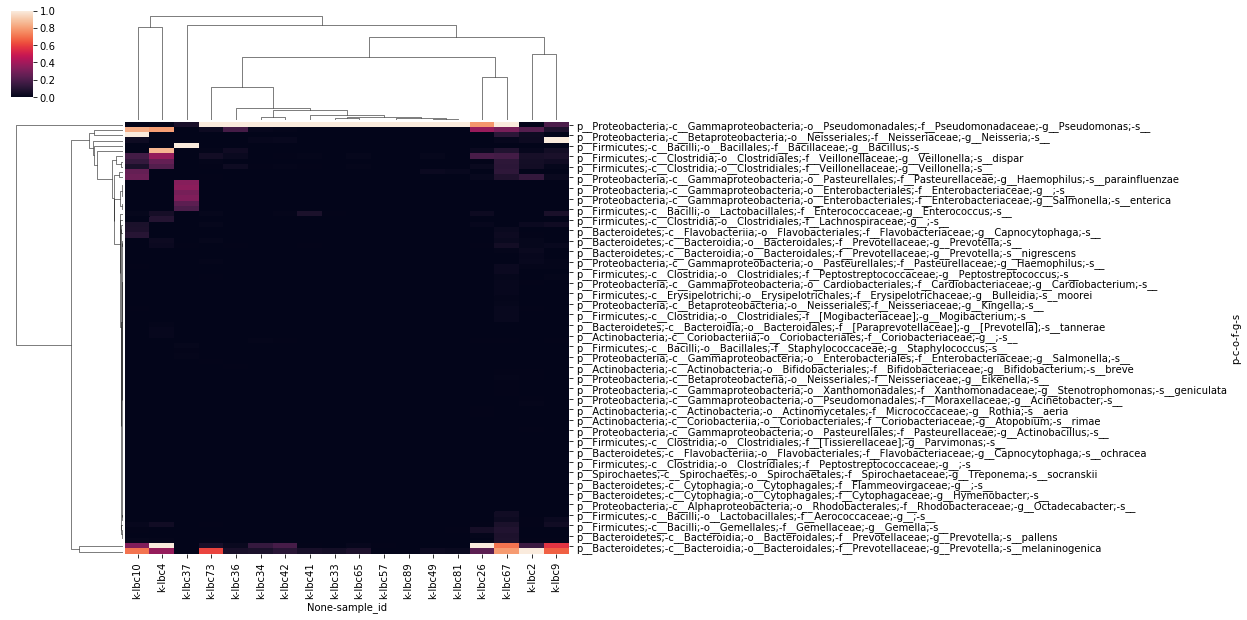

In [161]:
sns.clustermap(otu)

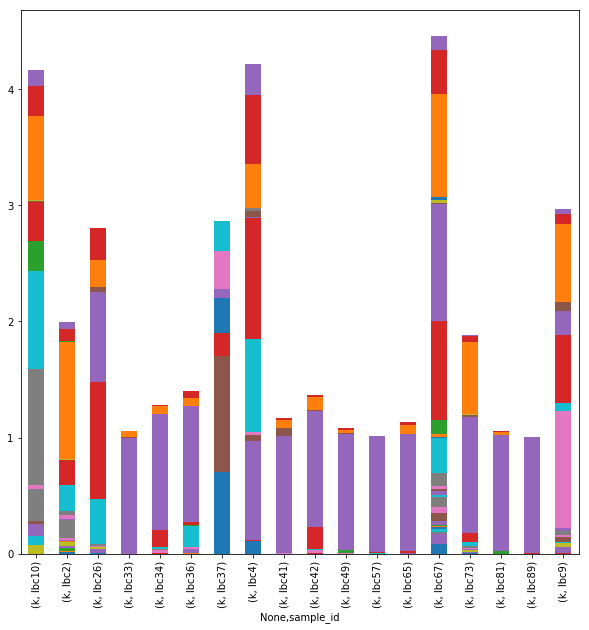

In [174]:
otu.groupby(level="g").sum().transpose().plot(kind='bar', stacked=True, figsize=(10,10), legend=False)